# Machine Learning Tutorial Python - 13: K Means Clustering Algorithm

K Means clustering algorithm is unsupervised machine learning technique used to cluster data points.
 In this tutorial we will go over some theory behind how k means works and then solve income group clustering problem using 
 sklearn, kmeans and python. Elbow method is a technique used to determine optimal number of k, we will review that method as
  well.

###### kmeans is unspervised
###### elbow method used to determine the correct number of clusters k
###### increasing number of clusters decreases the error

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv("income_ML13.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


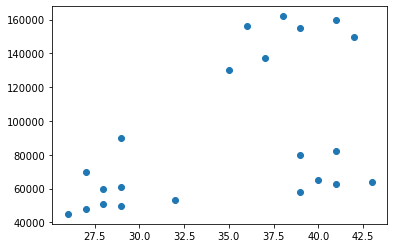

In [19]:
# plotting on a scatter plot
plt.scatter(df['Age'], df['Income($)'])

###### three clusters seen from the plot

In [20]:
# using kmeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [21]:
# fitting and predicting
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

###### visualize y_predicted 
###### plot on scatter plot

In [22]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


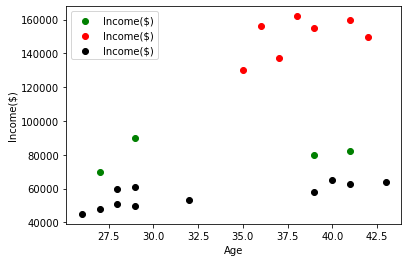

In [23]:
# separate clusters into 3 different dataframes
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color= 'green', label= 'Income($)')
plt.scatter(df2.Age, df2['Income($)'], color= 'red', label= 'Income($)')
plt.scatter(df3.Age, df3['Income($)'], color= 'black', label= 'Income($)')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [26]:
# green points not okay
# use min max scaler to resizee our scale
# interval between zero and one
scaler = MinMaxScaler()
# for income
scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])

# fr age
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [28]:
# using kmeans to train our scaled dataset
km = KMeans(n_clusters= 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [29]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [32]:
km.cluster_centers_
# centroids of the clusters

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

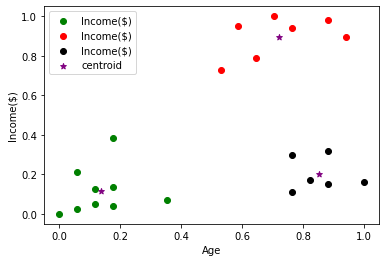

In [33]:
# plotting
# separate clusters into 3 different dataframes
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color= 'green', label= 'Income($)')
plt.scatter(df2.Age, df2['Income($)'], color= 'red', label= 'Income($)')
plt.scatter(df3.Age, df3['Income($)'], color= 'black', label= 'Income($)')

# plotting the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color= 'purple', marker= '*', label= 'centroid')


plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

### Elbow Plot

In [34]:
# elbow method handles large datasets
k_rng = range(1,10)
sse = []
for k in k_rng:
    # in each iteration,create a new model
    km = KMeans(n_clusters= k)
    km.fit(df[['Age', 'Income($)']])
    # calculate sse,use .inertia_ method
    sse.append(km.inertia_)

C:\Users\kimani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.2105547899547249,
 0.18454043009132765,
 0.13265419827245162,
 0.10188787724979426]

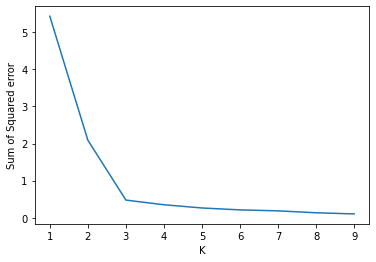

In [36]:
# plotting
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng, sse)

# exercise

###### 1.Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
###### 2.Figure out if any preprocessing such as scaling would help here
###### 3.Draw elbow plot and from that figure out optimal value of k